In [ ]:
from google.colab import files
files.upload()

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv


{'diabetes_prediction_dataset.csv': b'gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes\nFemale,80.0,0,1,never,25.19,6.6,140,0\nFemale,54.0,0,0,No Info,27.32,6.6,80,0\nMale,28.0,0,0,never,27.32,5.7,158,0\nFemale,36.0,0,0,current,23.45,5.0,155,0\nMale,76.0,1,1,current,20.14,4.8,155,0\nFemale,20.0,0,0,never,27.32,6.6,85,0\nFemale,44.0,0,0,never,19.31,6.5,200,1\nFemale,79.0,0,0,No Info,23.86,5.7,85,0\nMale,42.0,0,0,never,33.64,4.8,145,0\nFemale,32.0,0,0,never,27.32,5.0,100,0\nFemale,53.0,0,0,never,27.32,6.1,85,0\nFemale,54.0,0,0,former,54.7,6.0,100,0\nFemale,78.0,0,0,former,36.05,5.0,130,0\nFemale,67.0,0,0,never,25.69,5.8,200,0\nFemale,76.0,0,0,No Info,27.32,5.0,160,0\nMale,78.0,0,0,No Info,27.32,6.6,126,0\nMale,15.0,0,0,never,30.36,6.1,200,0\nFemale,42.0,0,0,never,24.48,5.7,158,0\nFemale,42.0,0,0,No Info,27.32,5.7,80,0\nMale,37.0,0,0,ever,25.72,3.5,159,0\nMale,40.0,0,0,current,36.38,6.0,90,0\nMale,5.0,0,0,No Info,18.8,6.2,85,0\nFemale,69.0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score, average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'diabetes_prediction_dataset.csv'  # Use your file path
data = pd.read_csv(file_path)

# Display the first few rows
data.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical variables
categorical_cols = ['gender', 'smoking_history']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = encoder.fit_transform(data[categorical_cols])

# Create a DataFrame for the encoded categories
encoded_cat_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))

# Display the one-hot encoded result
encoded_cat_df.head()

gender_Male  gender_Other  smoking_history_current  smoking_history_ever  \
0          0.0           0.0                      0.0                   0.0   
1          0.0           0.0                      0.0                   0.0   
2          1.0           0.0                      0.0                   0.0   
3          0.0           0.0                      1.0                   0.0   
4          1.0           0.0                      1.0                   0.0   

   smoking_history_former  smoking_history_never  smoking_history_not current  
0                     0.0                    1.0                          0.0  
1                     0.0                    0.0                          0.0  
2                     0.0                    1.0                          0.0  
3                     0.0                    0.0                          0.0  
4                     0.0                    0.0                          0.0

In [ ]:
# Combine encoded features with numerical features
numerical_cols = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X = pd.concat([encoded_cat_df, data[numerical_cols]], axis=1)
y = data['diabetes']

# Display the combined dataset
X.head()



gender_Male  gender_Other  smoking_history_current  smoking_history_ever  \
0          0.0           0.0                      0.0                   0.0   
1          0.0           0.0                      0.0                   0.0   
2          1.0           0.0                      0.0                   0.0   
3          0.0           0.0                      1.0                   0.0   
4          1.0           0.0                      1.0                   0.0   

   smoking_history_former  smoking_history_never  smoking_history_not current  \
0                     0.0                    1.0                          0.0   
1                     0.0                    0.0                          0.0   
2                     0.0                    1.0                          0.0   
3                     0.0                    0.0                          0.0   
4                     0.0                    0.0                          0.0   

    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  
0  80.0             0              1  25.19          6.6                  140  
1  54.0             0              0  27.32          6.6                   80  
2  28.0             0              0  27.32          5.7                  158  
3  36.0             0              0  23.45          5.0                  155  
4  76.0             1              1  20.14          4.8                  155

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few scaled rows
pd.DataFrame(X_scaled, columns=X.columns).head()


gender_Male  gender_Other  smoking_history_current  smoking_history_ever  \
0    -0.841046     -0.013418                -0.319946              -0.20423   
1    -0.841046     -0.013418                -0.319946              -0.20423   
2     1.188995     -0.013418                -0.319946              -0.20423   
3    -0.841046     -0.013418                 3.125524              -0.20423   
4     1.188995     -0.013418                 3.125524              -0.20423   

   smoking_history_former  smoking_history_never  smoking_history_not current  \
0               -0.321198               1.359930                    -0.262512   
1               -0.321198              -0.735332                    -0.262512   
2               -0.321198               1.359930                    -0.262512   
3               -0.321198              -0.735332                    -0.262512   
4               -0.321198              -0.735332                    -0.262512   

        age  hypertension  heart_disease       bmi  HbA1c_level  \
0  1.692704     -0.284439       4.936379 -0.321056     1.001706   
1  0.538006     -0.284439      -0.202578 -0.000116     1.001706   
2 -0.616691     -0.284439      -0.202578 -0.000116     0.161108   
3 -0.261399     -0.284439      -0.202578 -0.583232    -0.492690   
4  1.515058      3.515687       4.936379 -1.081970    -0.679490   

   blood_glucose_level  
0             0.047704  
1            -1.426210  
2             0.489878  
3             0.416183  
4             0.416183

In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

# Display the shapes of the sets
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


Training set: (60000, 13), (60000,)
Test set: (40000, 13), (40000,)


In [ ]:
import pandas as pd
import tensorflow as tf

# Dictionary to store results
results = []

def evaluate_model(model, X_test, y_test, model_name="Model"):
    """
    Evaluates the model, prints metrics, visualizes the ROC curve and confusion matrix,
    and stores the results in a dictionary for tabular display.
    """
    # Predictions
    if isinstance(model, tf.keras.Sequential): # Check if it's a Keras Sequential model
        y_pred = (model.predict(X_test) > 0.5).astype(int) # Convert probabilities to class labels for Keras models
        y_prob = model.predict(X_test).ravel()  # Use predict and flatten for Keras models
    elif hasattr(model, "predict_proba"):
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]  # Use predict_proba if available
    elif hasattr(model, "decision_function"):
        y_pred = model.predict(X_test)
        y_prob = model.decision_function(X_test)  # Use decision_function if available
    else:
        raise AttributeError(f"Model {model_name} does not have 'predict_proba', 'decision_function', or is not a Keras Sequential model.")

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    avg_prec = average_precision_score(y_test, y_prob)

    # Store results
    results.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Balanced Accuracy": balanced_acc,
        "Average Precision": avg_prec
    })

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name} - ROC Curve")
    plt.legend()
    plt.show()

    # Print metrics
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print(f"Average Precision: {avg_prec:.4f}")


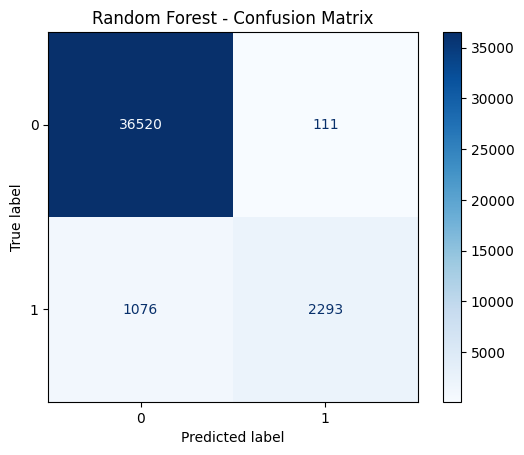

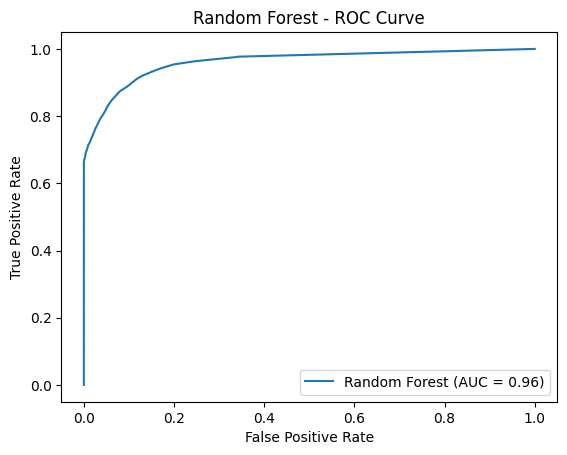

Random Forest Metrics:
Accuracy: 0.9703
Precision: 0.9538
Recall: 0.6806
F1 Score: 0.7944
ROC AUC: 0.9615
Balanced Accuracy: 0.8388
Average Precision: 0.8550


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate and store the results
evaluate_model(rf_model, X_test, y_test, model_name="Random Forest")


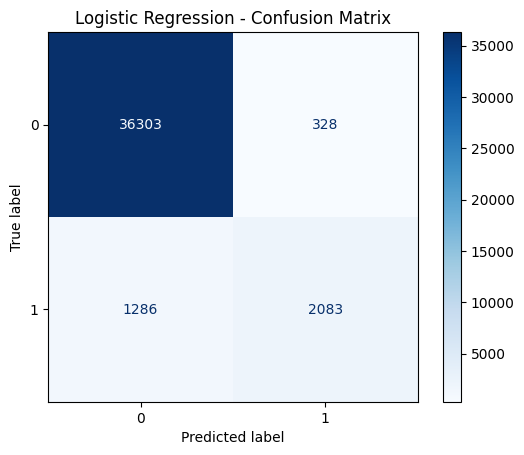

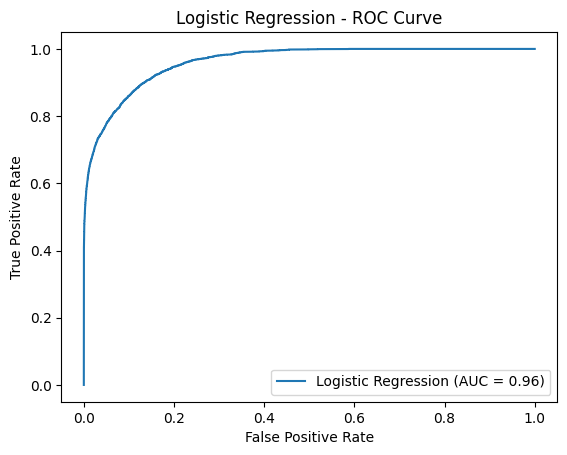

Logistic Regression Metrics:
Accuracy: 0.9597
Precision: 0.8640
Recall: 0.6183
F1 Score: 0.7208
ROC AUC: 0.9615
Balanced Accuracy: 0.8047
Average Precision: 0.8117


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit the model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Evaluate and store the results
evaluate_model(lr_model, X_test, y_test, model_name="Logistic Regression")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:18:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


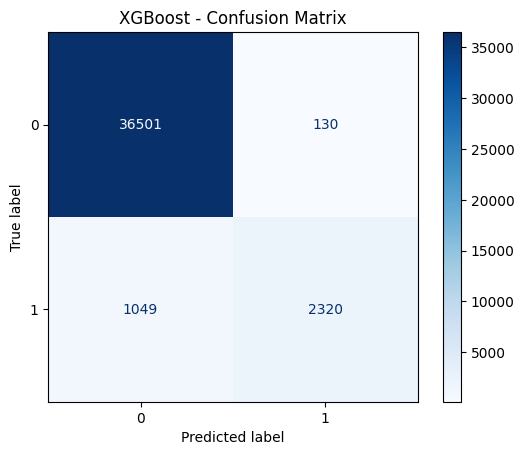

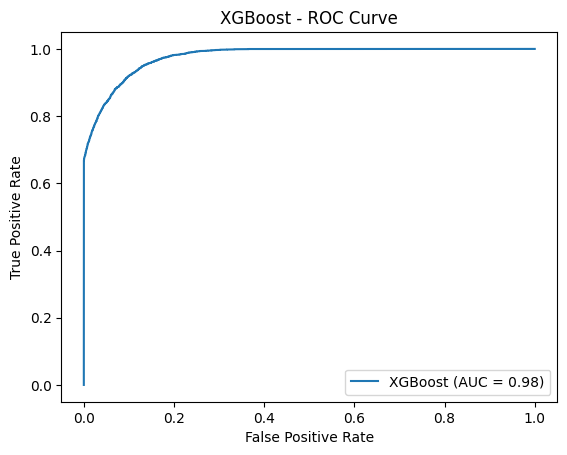

XGBoost Metrics:
Accuracy: 0.9705
Precision: 0.9469
Recall: 0.6886
F1 Score: 0.7974
ROC AUC: 0.9774
Balanced Accuracy: 0.8425
Average Precision: 0.8767


In [ ]:
from xgboost import XGBClassifier

# Initialize and fit the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate and store the results
evaluate_model(xgb_model, X_test, y_test, model_name="XGBoost")


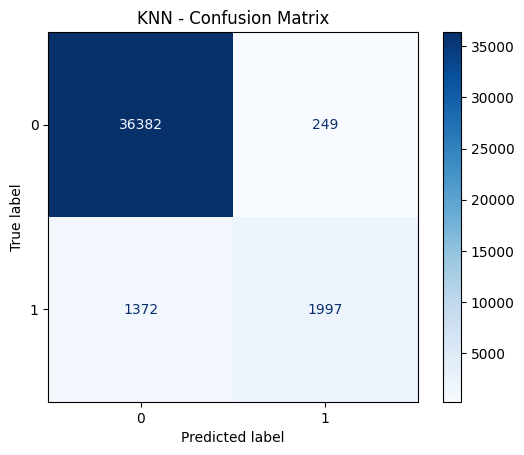

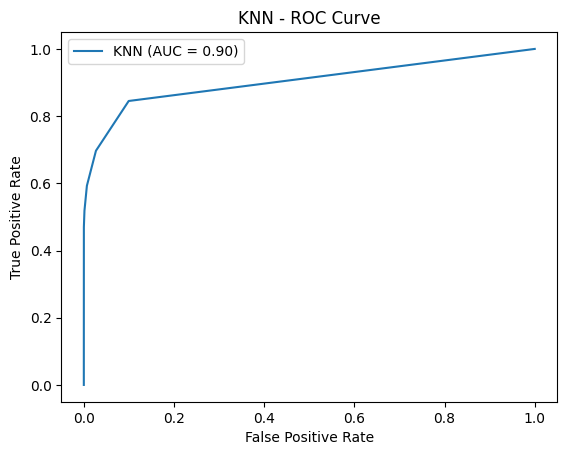

KNN Metrics:
Accuracy: 0.9595
Precision: 0.8891
Recall: 0.5928
F1 Score: 0.7113
ROC AUC: 0.9033
Balanced Accuracy: 0.7930
Average Precision: 0.7333


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and fit the model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Evaluate and store the results
evaluate_model(knn_model, X_test, y_test, model_name="KNN")


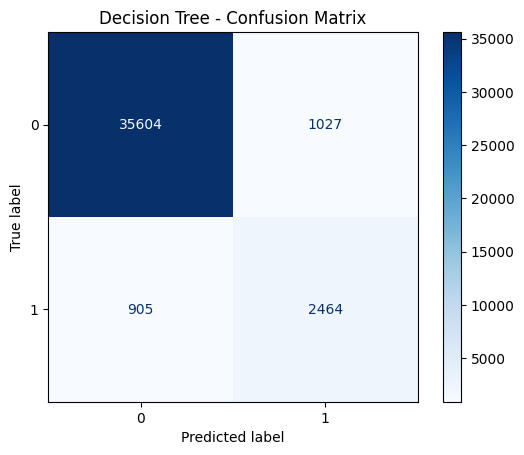

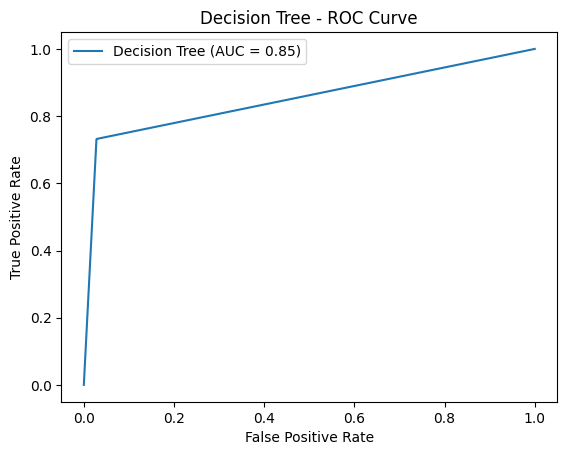

Decision Tree Metrics:
Accuracy: 0.9517
Precision: 0.7058
Recall: 0.7314
F1 Score: 0.7184
ROC AUC: 0.8520
Balanced Accuracy: 0.8517
Average Precision: 0.5395


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and fit the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate and store the results
evaluate_model(dt_model, X_test, y_test, model_name="Decision Tree")


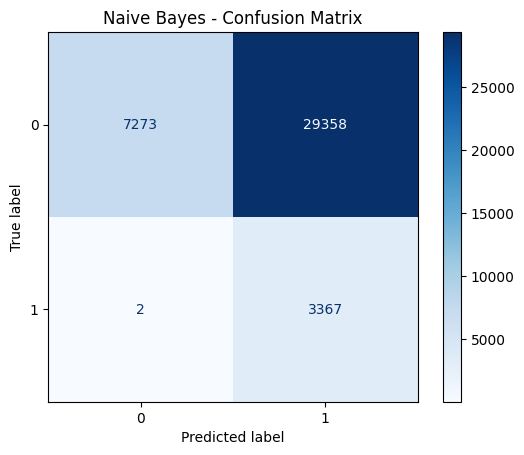

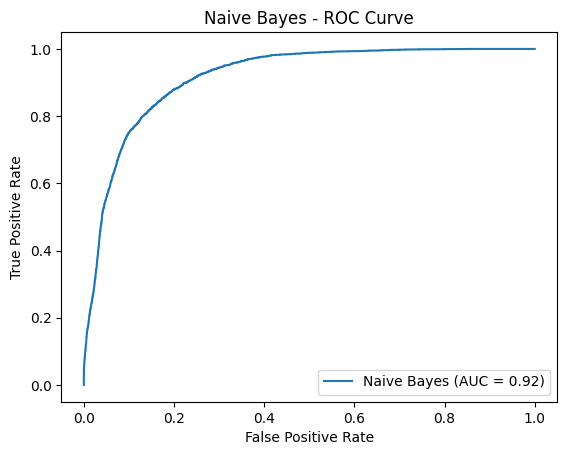

Naive Bayes Metrics:
Accuracy: 0.2660
Precision: 0.1029
Recall: 0.9994
F1 Score: 0.1866
ROC AUC: 0.9163
Balanced Accuracy: 0.5990
Average Precision: 0.5103


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize and fit the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Evaluate and store the results
evaluate_model(nb_model, X_test, y_test, model_name="Naive Bayes")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:19:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


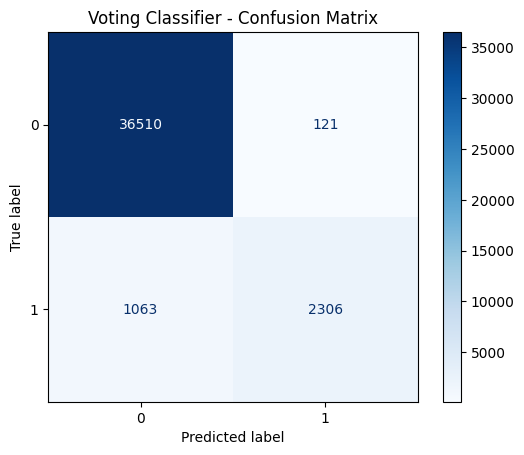

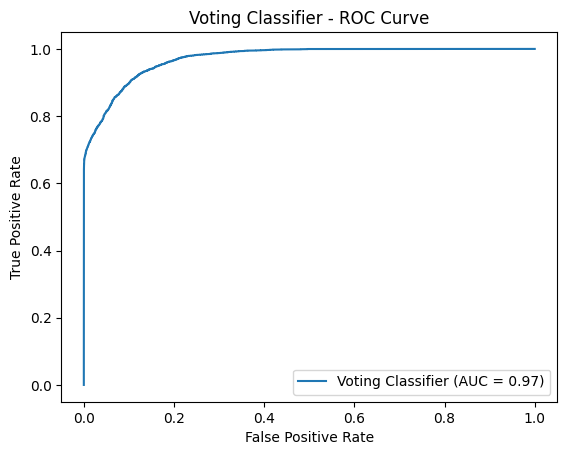

Voting Classifier Metrics:
Accuracy: 0.9704
Precision: 0.9501
Recall: 0.6845
F1 Score: 0.7957
ROC AUC: 0.9716
Balanced Accuracy: 0.8406
Average Precision: 0.8613


In [ ]:
from sklearn.ensemble import VotingClassifier

# Combine base models into a voting classifier
voting_model = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
        ('lr', LogisticRegression(max_iter=1000, random_state=42)),
        ('knn', KNeighborsClassifier()),
        ('dt', DecisionTreeClassifier(random_state=42))
    ],
    voting='soft'  # Use soft voting for better probabilistic averaging
)

# Fit the voting model
voting_model.fit(X_train, y_train)

# Evaluate and store the results
evaluate_model(voting_model, X_test, y_test, model_name="Voting Classifier")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:20:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:20:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:20:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


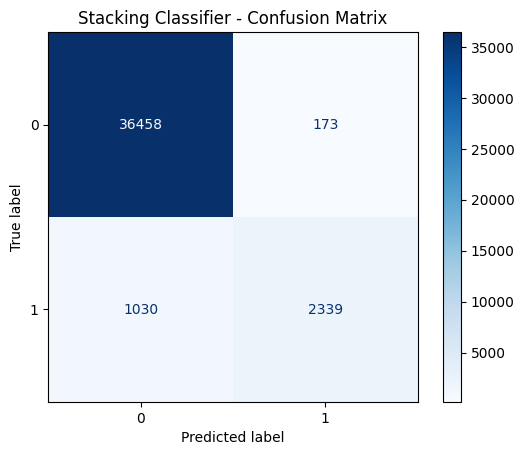

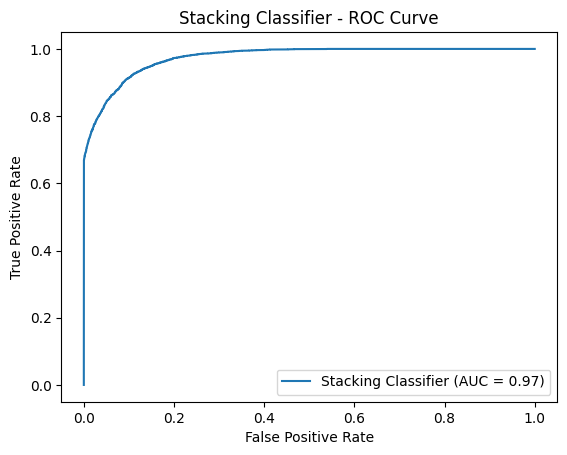

Stacking Classifier Metrics:
Accuracy: 0.9699
Precision: 0.9311
Recall: 0.6943
F1 Score: 0.7954
ROC AUC: 0.9748
Balanced Accuracy: 0.8448
Average Precision: 0.8742


In [ ]:
from sklearn.ensemble import StackingClassifier

# Base models for stacking
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('knn', KNeighborsClassifier())
]

# Meta-model: Logistic Regression for the final prediction
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(max_iter=1000, random_state=42)
)

# Fit the stacking model
stacking_model.fit(X_train, y_train)

# Evaluate and store the results
evaluate_model(stacking_model, X_test, y_test, model_name="Stacking Classifier")

### Neural **Network**

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9462 - loss: 0.1669 - val_accuracy: 0.9610 - val_loss: 0.1110
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9603 - loss: 0.1111 - val_accuracy: 0.9625 - val_loss: 0.1108
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9643 - loss: 0.1056 - val_accuracy: 0.9652 - val_loss: 0.1000
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9687 - loss: 0.0927 - val_accuracy: 0.9678 - val_loss: 0.0938
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9683 - loss: 0.0927 - val_accuracy: 0.9677 - val_loss: 0.0919
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9695 - loss: 0.0865 - val_accuracy: 0.9692 - val_loss: 0.0915
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9704 - loss: 0.0866 - val_accuracy: 0.9700 - val_loss: 0.0878
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9719 - loss: 0.0822 - val_accurac

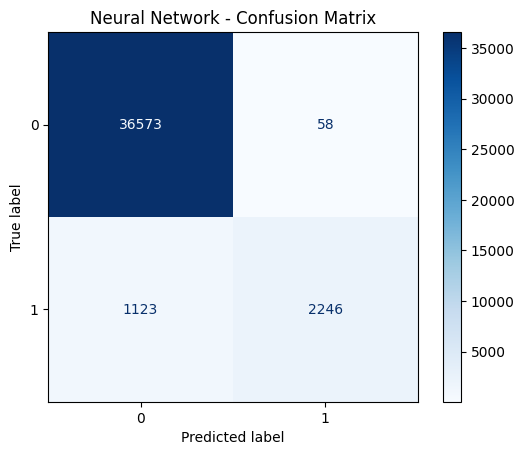

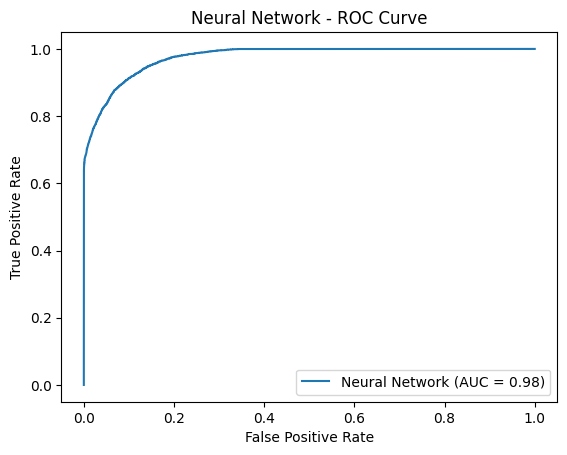

Neural Network Metrics:
Accuracy: 0.9705
Precision: 0.9748
Recall: 0.6667
F1 Score: 0.7918
ROC AUC: 0.9759
Balanced Accuracy: 0.8325
Average Precision: 0.8724


In [ ]:
# prompt: apply neural network to this code and also the evaluation metrics

import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
# Define the model
nn_model = Sequential()

# Input layer + 1st hidden layer
nn_model.add(tf.keras.layers.Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# 2nd hidden layer
nn_model.add(tf.keras.layers.Dense(units=32, activation='relu'))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.1)

# Evaluate and store the results
evaluate_model(nn_model, X_test, y_test, model_name="Neural Network")

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


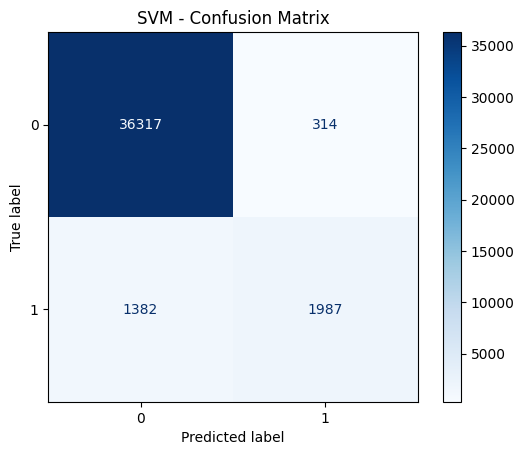

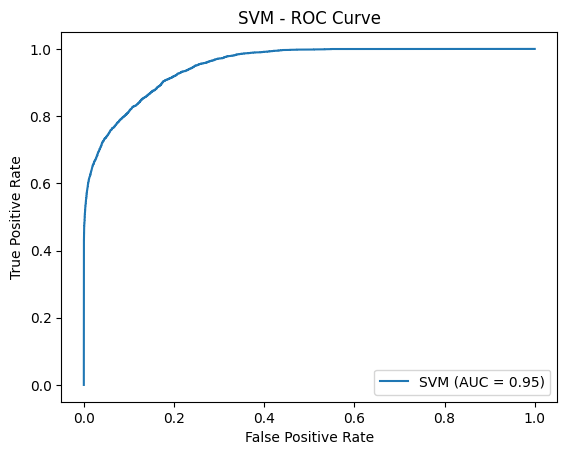

SVM Metrics:
Accuracy: 0.9576
Precision: 0.8635
Recall: 0.5898
F1 Score: 0.7009
ROC AUC: 0.9515
Balanced Accuracy: 0.7906
Average Precision: 0.7832


In [ ]:
# prompt: implement svm so that it does not stuck

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Initialize SVM model with a linear kernel and set max_iter to a high value
svm_model = SVC(kernel='linear', max_iter=10000, probability=True, random_state=42)  # Increase max_iter

# You can also try other kernels like 'rbf' or 'poly'
# svm_model = SVC(kernel='rbf', max_iter=10000, probability=True, random_state=42)

# Define parameter grid for hyperparameter tuning (optional)
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    # 'gamma': [0.1, 1, 10],  # Kernel coefficient (only for RBF kernel)
}

# Create GridSearchCV object for hyperparameter tuning (optional)
# grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)
# svm_model = grid_search.best_estimator_  # Use the best model found

# Fit the SVM model
svm_model.fit(X_train, y_train)

# Evaluate and store the results
evaluate_model(svm_model, X_test, y_test, model_name="SVM")


In [ ]:
# prompt: show all the results with model in table

import pandas as pd
from tabulate import tabulate
# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Display the results table
print("Model Performance:")
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid'))


Model Performance:
╒════╤═════════════════════╤════════════╤═════════════╤══════════╤════════════╤═══════════╤═════════════════════╤═════════════════════╕
│    │ Model               │   Accuracy │   Precision │   Recall │   F1 Score │   ROC AUC │   Balanced Accuracy │   Average Precision │
╞════╪═════════════════════╪════════════╪═════════════╪══════════╪════════════╪═══════════╪═════════════════════╪═════════════════════╡
│  0 │ Random Forest       │   0.970325 │    0.953827 │ 0.680617 │   0.794388 │  0.961472 │            0.838794 │            0.855041 │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┼─────────────────────┼─────────────────────┤
│  1 │ Logistic Regression │   0.95965  │    0.863957 │ 0.618284 │   0.720761 │  0.961543 │            0.804665 │            0.811743 │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┼─────────────────────┼─────────────────────┤
│  2 │ XGBoost             │ 